In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix 
import matplotlib.pyplot as plt

In [2]:
#a. How often does the candidate who raised more money win a race? -
#b. How often does the candidate who spent more money win a race? -
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race?
#d. How often does the incumbent candidate win a race?
#e. Can you detect any relationship between amount of money raised and
# the incumbent status of a candidate?

In [3]:
df_ex = pd.read_csv('scraped_data.csv')
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,"$1,971,321","$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,"$80,095","$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,"$650,807","$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,"$56,050","$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,"$1,193,111","$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,"$1,261,957","$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,"$3,202,905","$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,"$416,978","$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,"$3,003,883","$3,060,167"


In [4]:
# need to change class types.  

In [5]:
#df_ex['Raised'] = df_ex['Raised'].astype(float)
#df_ex['Raised'] = df_ex['Raised'].replace(',', '')
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,"$1,971,321","$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,"$80,095","$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,"$650,807","$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,"$56,050","$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,"$1,193,111","$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,"$1,261,957","$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,"$3,202,905","$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,"$416,978","$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,"$3,003,883","$3,060,167"


In [6]:
# Delete commas and dollar signs, make 'Raised' into a float, from another datatype:

df_ex['Raised'] = df_ex['Raised'].str.replace(',', '')
df_ex['Raised'] = df_ex['Raised'].str.replace('$', '')
df_ex['Raised'] = df_ex['Raised'].astype(float)
df_ex

C:\Users\micha\AppData\Local\Temp\ipykernel_17304\3015267476.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ex['Raised'] = df_ex['Raised'].str.replace('$', '')


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,"$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,"$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,"$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,"$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,"$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,"$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,"$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,"$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,"$3,060,167"


In [7]:
# make 'Spent' into a float, from another datatype:
df_ex['Spent'] = df_ex['Spent'].str.replace(',', '')
df_ex['Spent'] = df_ex['Spent'].str.replace('$', '')
df_ex['Spent'] = df_ex['Spent'].astype(float)
df_ex

C:\Users\micha\AppData\Local\Temp\ipykernel_17304\1077864151.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ex['Spent'] = df_ex['Spent'].str.replace('$', '')


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,3060167.0


In [8]:
#A potential methodology = Come up with a DataFrame that contains just the winners. 
#Then make another DataFrame that contains, for each race, the candidate who raised the most money. 
#If you can do that, then you could merge those together and then be able to do a comparision.
#pandas does also have a rank method that could come in handy: 
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.rank.html

In [9]:
df_ex.dtypes

Unnamed: 0           int64
State               object
District             int64
Name                object
Party               object
Incumbent             bool
Winner                bool
Vote Percentage    float64
Raised             float64
Spent              float64
dtype: object

In [10]:
#a. How often does the candidate who raised more money win a race? 
# group by state and district, then add a column that shows true if they raised the most money in their race.
df_ex['MaxRaisePer'] = df_ex.groupby(['State', 'District'])['Raised'].transform(lambda x: x == x.max())
#df_ex=df_ex.drop(['MaxRaise&Won'], axis=1)
df_ex.head()


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True


In [11]:
# Subset winners only
df_ex_win = df_ex[df_ex['Winner'] == True]
df_ex_win

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [12]:
#Subset MaxRaisePer and counted.  Compare again df_ex_win
df_ex_win_count = df_ex_win[df_ex_win['MaxRaisePer'] == True] 
df_ex_win_count

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [13]:
# Answer a, as a decimal. 
a = (381/428)
a

0.8901869158878505

In [14]:
#b. How often does the candidate who spent more money win a race?
# group by state and district, then add a column that shows true if they spent the most money in their race.
df_ex['MaxSpentPer'] = df_ex.groupby(['State', 'District'])['Spent'].transform(lambda x: x == x.max())
df_ex=df_ex.drop(['MaxRaisePer'], axis=1)
df_ex.head()


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True


In [15]:
# Subset into winners only, Can't use previous because of column changes
df_ex_win2 = df_ex[df_ex['Winner'] == True]
df_ex_win2

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [16]:
# Subset MaxSpentPer from df_ex_win2
df_ex_win_spent = df_ex_win2[df_ex_win2['MaxSpentPer'] == True].count()
df_ex_win_spent

Unnamed: 0         378
State              378
District           378
Name               378
Party              378
Incumbent          378
Winner             378
Vote Percentage    378
Raised             378
Spent              378
MaxSpentPer        378
dtype: int64

In [17]:
# Print answer b as a decimal
b = (378/428)
b

0.883177570093458

In [18]:

#df_t = df_ex(['Won'] == True).sum() / df_ex['Won'].count()
#df_t

In [19]:
#df_ex['Incumbent'].corr(df_ex['Winner'])
#df_ex['Incumbent'].plot(kind = 'bar')

# copy the data
#df_min_max_scaled = inequality_clean.copy()

# ap normalization techniques
#column = 'Gini coefficient'
#df_min_max_scaled['Gini coefficient'] = (df_min_max_scaled['Gini coefficient'] - df_min_max_scaled['Gini coefficient'].min()) / (df_min_max_scaled['Gini coefficient'].max() - df_min_max_scaled['Gini coefficient'].min())	

# view normalized data
#display(df_min_max_scaled)

In [48]:
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race?
#Yes!
#What else to add?
# You could groupby district, then subtract larger vs smaller, then correlate
#to winner


In [21]:
#d. How often does the incumbent candidate win a race?
#Make a df of incumbents. Then compare against winners
dfi =  df_ex[df_ex['Incumbent'] == True]
dfi

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
8,8,AL,6,Gary Palmer,R,True,True,97.1,907219.0,909082.0,True
9,9,AL,7,Terri Sewell,D,True,True,97.2,2168165.0,1495957.0,True
...,...,...,...,...,...,...,...,...,...,...,...
797,797,WI,4,Gwen Moore,D,True,True,74.7,1183995.0,1166739.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [47]:
#Compare incumbents against winners for answer to d.
d = (382/428)
d

0.8925233644859814

In [22]:
#e. Can you detect any relationship between amount of money raised and
# the incumbent status of a candidate?
df_ex['Incumbent'].corr(df_ex['Raised']) # Low correlation, but still correlation...
#df_ex['Raised'].plot(kind = 'bar');

0.23580865297654205

In [ ]:
#Visual ideas:
# -Bifurcate by Party, make a box plot
# -Do something with top 10 raised, bottom 10 raised scatterplot. 
# Make the dots larger or smaller according to
# the amount of money spent

# -Make a scatterplot for each party, rep and dem
# 

In [24]:
#Bifurcate by rep
df_ex_r = df_ex[df_ex['Party'] == 'R']
df_ex_r

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


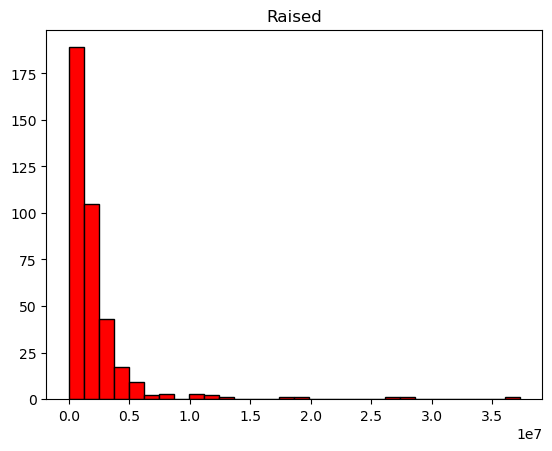

In [45]:
df_ex_r.hist('Raised', bins=30, color = 'red', grid=False, edgecolor = 'black');

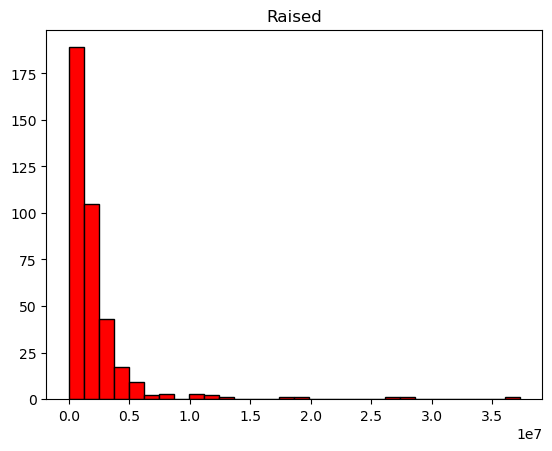

In [46]:
df_ex_r.hist('Raised', bins=30, color = 'red', grid=False, edgecolor = 'black');

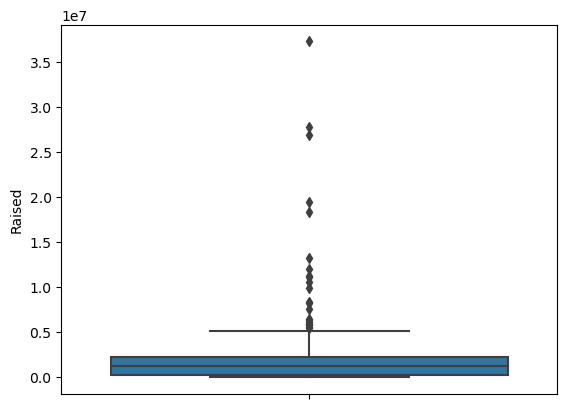

In [39]:
sns.boxplot(data=df_ex_r, y="Raised");

In [27]:
#Bifurcate by d
df_ex_d = df_ex[df_ex['Party'] == 'D']
df_ex_d

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
5,5,AL,3,Adia Winfrey,D,False,False,32.4,50273.0,40971.0,False
9,9,AL,7,Terri Sewell,D,True,True,97.2,2168165.0,1495957.0,True
12,12,AZ,1,Tom O'Halleran,D,True,True,51.6,3381353.0,3324138.0,True
...,...,...,...,...,...,...,...,...,...,...,...
799,799,WI,5,Tom Palzewicz,D,False,False,39.9,370392.0,371799.0,False
801,801,WI,6,Jessica King,D,False,False,40.7,287753.0,245788.0,False
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0,False
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0,False


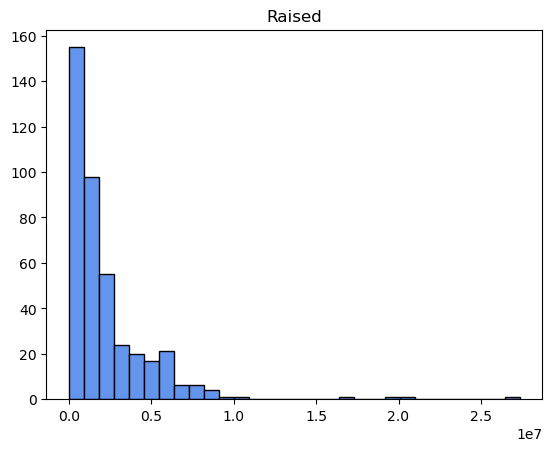

In [43]:
df_ex_d.hist('Raised', bins=30, color = 'cornflowerblue', grid=False, edgecolor = 'black');

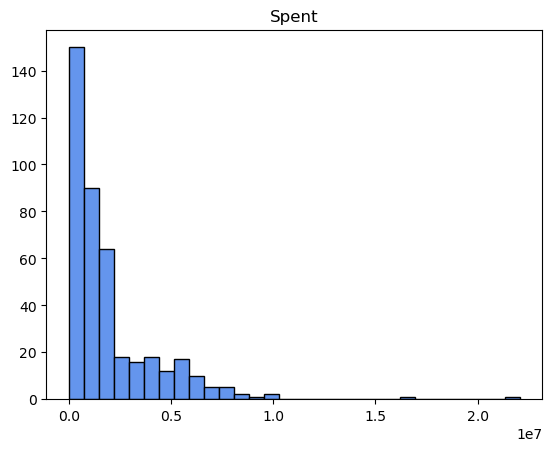

In [44]:
df_ex_d.hist('Spent', bins=30, color = 'cornflowerblue', grid=False, edgecolor = 'black');

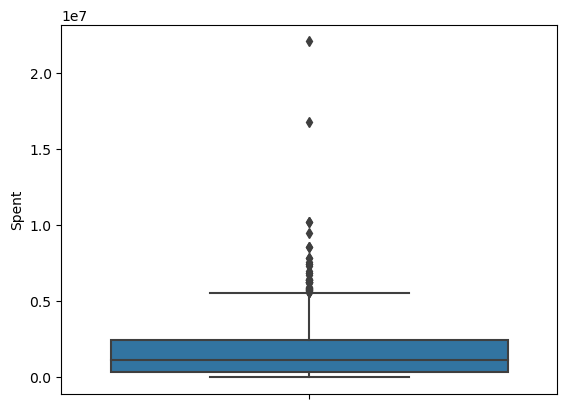

In [40]:
sns.boxplot(data=df_ex_d, y="Spent");

In [63]:
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race?
#Yes!
#What else to add?
# You could groupby district, then subtract larger vs smaller, then correlate
#to winner
df_ex = df_ex.rename(columns={'Vote Percentage':'Vote_Percentage'})
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
...,...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0,False
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0,False
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,3060167.0,True


In [ ]:
#run a 1 sample t test on every candidate that won 51% of the vote?
#stats.ttest_1samp(a=gujarat_ages,popmean=population_ages.mean())

In [71]:
lm = smf.ols('Vote_Percentage ~ np.log(Raised)', data = df_ex).fit()
lm.summary()
#df_ex.dtypes

C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Vote_Percentage   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     425.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.52e-76
Time:                        21:28:13   Log-Likelihood:                -3314.1
No. Observations:                 807   AIC:                             6632.
Df Residuals:                     805   BIC:                             6642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -25.9116      3.756     -6.898      0.000     -33.285     -18.538
np.log(Raised)     5.6884      0.276     20.620      0.000       5.147       6.230
==============================================================================
Omnibus:                       57.694   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.236
Skew:                           0.607   Prob(JB):                     4.60e-17
Kurtosis:                       3.875   Cond. No.                         99.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

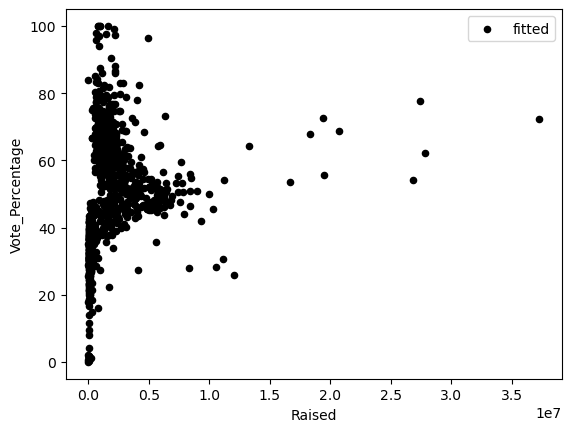

In [70]:
df_ex.plot(x = 'Raised', y = 'Vote_Percentage', kind = 'scatter', color = 'black', label = 'fitted');